# Pseudo Code 

For S1 and S2

1) First define when is cutoff between S1 or S2 (eg. 30 minutes long operation)  
2) Use the above value as the upper bound of S1   
3) Use the above value as the lower bound of S2  
4) Create a piecewise function where if x<a, return 0, x>b return 0 and if a<x<b, return a value (eg. 10)  

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
start_time = 30
end_time = 100
cutoff = 30
power = 10

## S1

In [3]:
# Function to create the a and b constant of S1
# Rule: b - a < cutoff 
def s1_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a, a + cutoff)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s1(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

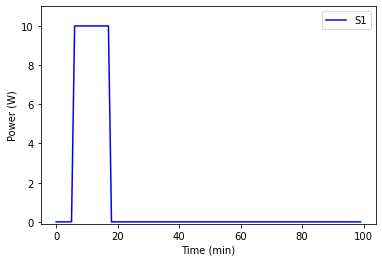

In [4]:



# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s1_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s1(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S1")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

## S2

In [5]:
import random

# Function to create the a and b constant of S2
# Rule: b - a > cutoff
def s2_constants(): 
    a = random.randint(0, start_time)
    b = random.randint(a+cutoff, end_time)
    return a,b

# Given a and b 
# If x < a, return 0 because motor didn't start yet
# If a < x < b, return power since motor is active
# If x > b, return 0 because motor stopped operation
def s2(x,a,b):
 if(x < a): return 0
 if(a<=x<=b): return power 
 else: return 0

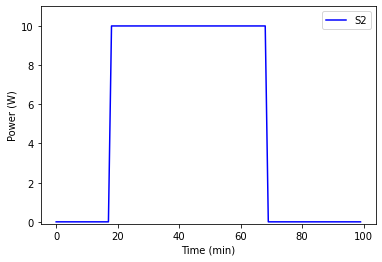

In [6]:
# Return a numpy array starting at 0-end_time with 1 as the increment
x = np.arange(0, end_time, 1)

# Get the a and b constant for this run
a, b = s2_constants()

# Use the s1 function to get the results for each time
y = []
for i in range(len(x)):
   y.append(s2(x[i], a, b))

# Plot the results
plt.plot(x,y,color='blue', label ="S2")
ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()

# Create Dataframe using Piecewise Function

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/

In [7]:
lists = []

# Generate a run of S1
def s1_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s1_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s1(x[i], a, b))
    return y

# Generate a run of s2
def s2_generator():
    # Return a numpy array starting at 0-end_time with 1 as the increment
    x = np.arange(0, end_time, 1)

    # Get the a and b constant for this run
    a, b = s2_constants()

    # Use the s1 function to get the results for each time
    y = []
    for i in range(len(x)):
       y.append(s2(x[i], a, b))
    return y

In [8]:
# For each run, append to lists
# In this case, only s1 was used so that it could be tested
runs = 3
lists = []
for val in range(runs): 
    lists.append(s1_generator())

In [9]:
# Convert the list of lists into a numpy array
numpyArray = np.array(lists)

# Create a dataframe where each row is a run
panda_df = pd.DataFrame(data = numpyArray,
                        index = ['Run_' + str(i + 1) 
                        for i in range(numpyArray.shape[0])],
                        columns = x)

In [10]:
print(panda_df.shape[0]  )

3


## Plotting Every Run

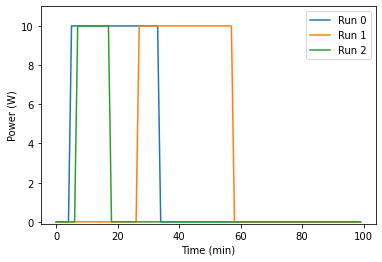

In [11]:
# X-axis: df.columns becuase each column is a time value
# Y-axis: df.iloc[row, :] because each value in the row is the current power value at time x 
for i in range (panda_df.shape[0]):
    plt.plot(panda_df.columns,panda_df.iloc[i,:], label = "Run "+str(i))

ax = plt.gca()
ax.set_ylim([-0.1, power+1])
ax.legend()
plt.xlabel("Time (min)")
plt.ylabel("Power (W)")

plt.show()   